In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# scipy : optimization, interpolation, 미적분, fft를 지원하는 패키지 : matlab
# curve_fit 

In [6]:
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y = np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
z = np.polyfit(x,y,3) # x,y로부터 방정식의 계수를 찾아라. - 단, 3차원으로 찾아라.
# => 4개 나옴. (3차원이니 3개, 절편 1개 : -0.03968254)
print(z)

p = np.poly1d(z) # poly1d() : 방정식으로 변환하는 함수 : 0.08704 x^3 - 0.8135 x^2 + 1.693 x - 0.03968
print("방정식",p)
p(0.5)
p(3.5)
p(10)
p(3.0)

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]
방정식          3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


0.06825396825396512

-0.7126984126984173


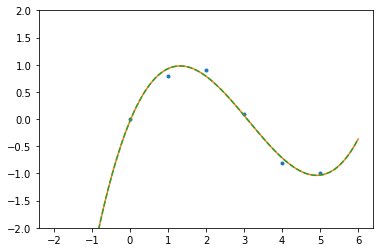

In [7]:
p30 = np.poly1d(np.polyfit(x,y,3)) # poly1d() : 방정식으로 변환하는 함수
print(p30(4))

xp = np.linspace(-2,6,100) # -2에서 6까지 100등분한 수 중에 어떤 수를 넣어주면 그에 합당하는 방정식으로 구한 값을 리턴.
_ = plt.plot(x,y,'.',xp,p(xp),'-',xp,p30(xp),'--')
plt.ylim(-2,2)
plt.show()

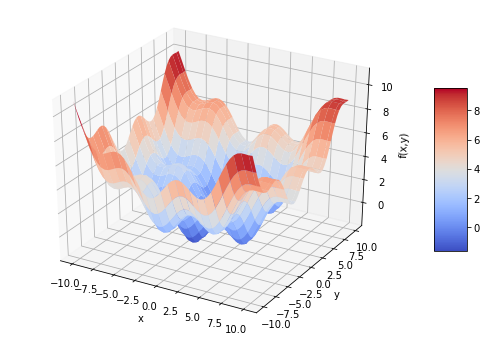

In [12]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y **2)

x = np.linspace(-10,10,50) # -10부터 10까지 50등분
y = np.linspace(-10,10,50)

X,Y = np.meshgrid(x,y) # 격자
Z = fm((X,Y))

X,Y = np.meshgrid(x,y)
Z = fm((X,Y))

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X,Y,Z, rstride = 2, cstride=2, cmap=mpl.cm.coolwarm, linewidth = 0.5, antialiased = True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

# 최적점 = 맨 아래. 최저점.
# 인간은 시각화해서 한 번에 알 수 있지만, 컴퓨터는 기울기가 0이면 거기가 최적점인 줄 알고 멈춰버림 => momentum을 실행해서
# 원래 가던 방향으로 몇 번 더 값을 줘 본다.
# GD : Gradient desscent : 경사 하강법 -> ANN(Artificial Newral Network) : 가장 단점 - 지역해 문제, fitting 시간 문제(학습률 문제)
# 지역해 문제 해결 => momentum
# 학습률 문제 => 처음에는 많이 주고, 점점 작게 값을 준다.

# Adam optimizer

In [19]:
# 무작위 대입법
import scipy.optimize as spo

def fo(p):
    x,y = p
    z = np.sin(x) + 0.05 * x **2 + np.sin(y) + 0.05 * y **2
    if output ==True :
        print('%8.4f %8.4f %8.4f' % (x,y,z))
    return z

output = True
opt1 = spo.brute(fo, ((-10,10.1,5), (-10,10.1,5)), finish = None)
# x,y의 범위값을 주고(-10부터 10.1까지 5개), 랜덤으로 대입(brute)
print(opt1)



output = False
opt1 = spo.brute(fo, ((-10,10.1,0.1), (-10,10.1,0.1)), finish = None)
# x,y의 범위값을 주고(-10부터 10.1까지 5개), 랜덤으로 대입(brute)
print(opt1)
# 옛날엔 이렇게 찾았는데 이제는 ANN으로 최적해를 찾는다. ( 행렬곱을 이용해서 )

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120
[0. 0.]
[-1.4 -1.4]


In [22]:
# ANN으로 최적해를 찾는다.

output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter = 15, maxfun=20) # 최저값 찾기
opt2

fm(opt2)
output = False
spo.fmin(fo, (2.0,2.0), maxiter=250) # 할강단체법

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757
Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

## 선형회귀 Linear Regression : 기울기와 절편을 찾는 것.
- 전제 조건 ( 통계학에서 )
    - 1. 선형성을 띄고 있어야 한다. <==> 비선형성 [* scikits에서는 polynomial + LR => 비선형문제 해결]
        - 비선형성을 띄고 있으면 => 과적합 됨.
    - 2. 정규성 : 오차가 정규분포를 띈다. OLS, GLS
    - 3. 독립성 : 변수간에 다중공선성이 있으면 안된다.하나의 변수에 자기회귀가 있으면 안된다.(자기회귀가 있으면 시계열 분석을 한다.)
        - scikits에서는 다중공선성을 lasso(절대값규제), Ridge(제곱), ElsticNet(lasso+Ridge)으로 해결
        - Regulization은 에러가 이미 존재한다고 보고 회귀한다.
       
    - 4. 등분산성 : 이산성을 고려한 모델을 사용한다.

In [34]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
bias = 100 # 절편 = 100

X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
# 200개의 특성, 1개의 속성, 절편 = 100, 노이즈 = 10, coef = 계수 = 기울기
# X0, y, w = 200개

print(X0[:5,:])
# 선형회귀 시 범주형은 상수로 등록. ex ) statsmodels에서 회귀분석시 상수별로 회귀분석을 실행함.
X = sm.add_constant(X0) # 상수항(절편)을 고려하라.
print(X[:5,:]) # 상수항이 하나 추가됨.
y = y.reshape(len(y), 1)
print(w) # 86.44794300545998

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[[ 1.          0.23249456]
 [ 1.         -0.03869551]
 [ 1.          0.5505375 ]
 [ 1.          0.50318481]
 [ 1.          2.18697965]]
86.44794300545998


In [35]:
import numpy as np
# 행렬곱 연산자 : @ => ANN(인공신경망 : Artificial Neural Network)
w = np.linalg.inv(X.T @ X) @ X.T @ y # inve = inverse = 역행렬
w
# 86.96171201

array([[99.79150869],
       [86.96171201]])

In [36]:
import statsmodels.api as sm
# ordinary least square : 회귀 모델
# y = a^x + b 에서 a,b를 찾아낸다는 소리.

model = sm.OLS(y, X) # statsmodels에서 ordinary least square(최소제곱법)를 이용한 선형회귀
result = model.fit()
print(result.summary())
# Dep. Variable : 독립변수
# R-squared: 설명력 = 회귀제곱합/총오차제곱합
#Adj. R-squared:                  0.985 수정된 R-squared
# F-value (분산비) : 분산이 이루는 비
result.params # array([99.79150869, 86.96171201])


# Prob (F-statistic) F-분포 비의 확률값:          8.17e-182 => 유의미하다.
# AIC, BIC의 숫자가 작은 것이 좋음.

# Durbin-Watson: 자기 상관성. 1을 기점으로 해서 2이면 자기 상관성이 없다는 소리.
# 0 ~ 2 사이면 양의 상관성, ~ 0.4 : 음의 상관성
# Jarque-Bera (JB):                1.059 : 정규성
# Skew(외도):                           0.121 - 기준점 : 0 => 0.121 : 약간 비대칭
# Kurtosis : 표준정규분포가 3. => 약간 벗어나있다.
# Cond. No : 다중공선성이 있는 경우
# Warnings: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. <- 이케 나옴.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 13 Jan 2020   Prob (F-statistic):          8.17e-182
Time:                        13:14:56   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

array([99.79150869, 86.96171201])

In [37]:
# 최소제곱법
y = 86.96171201 * x + 99.79150869

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston() # 보스톤 집 값에 대한 예측 문제

# 내용을 보기 위해서 데이터프레임으로 변경한 것.
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ["MEDV"])
print(dfX.head())
dfy.head() # 평균값으로 집값예측

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [48]:
# 속성의 열 이름 확인
boston.feature_names  # 변수 = 13개

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [49]:
# => 계수도 13개 나와야 함.
# 독립변수 -> 종속변수
# fit : 계수(파라미터 parameter)를 구할 수 있다.
model_boston = LinearRegression().fit(boston.data, boston.target) # 독립변수(data), 종속변수(target)

In [59]:
# 결과 속성을 이용해서 결과 확인 -> 결과를 확인하는 건 항상 끝에 언더바(_)가 붙음 => 13개
# scikits에서 계수를 확인하는 법 : coef_ = coefficient 계수
print(model_boston.coef_)
model_boston.intercept_

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


36.459488385089855

In [51]:
predictions = model_boston.predict(boston.data) # 독립변수를 가지고 예측해 봐라?

In [57]:
predictions - boston.target # 잔차

array([ 6.00384338e+00,  3.42556238e+00, -4.13240328e+00, -4.79296351e+00,
       -8.25647577e+00, -3.44371554e+00,  1.01808268e-01, -7.56401157e+00,
       -4.97636315e+00,  2.02621071e-02,  3.99949651e+00,  2.68679568e+00,
       -7.93478472e-01, -8.47097189e-01,  1.08348205e+00, -6.02516792e-01,
       -2.57249021e+00, -5.88598653e-01, -4.02198894e+00,  2.06136033e-01,
       -1.07614247e+00, -1.92896331e+00,  6.32881292e-01, -6.93714654e-01,
        7.83383155e-02, -5.13314391e-01, -1.13602345e+00, -9.15257194e-02,
        1.14737285e+00, -1.23571798e-01, -1.24488241e+00,  3.55923295e+00,
       -4.38894264e+00,  1.18275814e+00,  2.06758913e-01,  4.91463526e+00,
        2.34193708e+00,  2.10891142e+00, -1.78497388e+00,  5.57625688e-01,
       -6.84897746e-01,  1.42056414e+00, -9.61337195e-02, -9.02072745e-02,
        1.74149176e+00,  2.79669817e+00,  4.23200323e-01,  1.43655088e+00,
       -5.29344623e+00, -2.19392249e+00,  1.58152535e+00,  3.47222285e+00,
        2.65585080e+00,  

In [60]:
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y = np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
z = np.polyfit(x,y,3) # x,y로부터 방정식의 계수를 찾아라. - 단, 3차원으로 찾아라.
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [76]:
X = [[0.44,0.68], [0.99,0.23]]
y = [109.85, 155.72]
X_test = [[0.49, 0.18]]

In [77]:
# 비선형 회귀인 경우 = 다차방정식으로 변환하고 + Linear Regression = 비선형 회귀
# 데이터가 2차 => "포물선 형태"를 띈다고 생각
# 다차 방정식의 특성을 추가
poly = PolynomialFeatures(degree=2)

# scikits에는 estimator(파라미터 추정기(기울기, 절편)추정), predict(예측)
X_ = poly.fit_transform(X) # transformer = fit + transform(변형)
X_test_ = poly.fit_transform(X_test)

In [78]:
lg = LinearRegression() # 선형회귀
lg.fit(X_,y)
lg.coef_ # 다차 방정식 계수

array([  0.        ,  19.4606578 , -15.92235638,  27.82874066,
        -2.52988551, -14.48934431])

In [79]:
lg.predict(X_test_) # 비선형 예측

array([126.84247142])

## 로지스틱 회귀분석 logistic function => 0~1 사이의 값으로 출력
- 회귀분석 후 => mapping : 회귀분석 결과값을 logistic function의 값으로 매핑함 (확률값 = 0 ~ 1 사이 값.)
    - 0.5를 기준으로 해서 이보다 크면 참, 작으면 거짓. => 이진 로지스틱
    이 후 발전 => 2개 이상의 종속변수 인 경우 : not 이진 ==> Softmax
- 연속된 독립변수들의 입력 => 이산적 결과로 판정

### Regression : 연속된 수칙으로 입력되고, 결과도 연속된 수치임.

C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


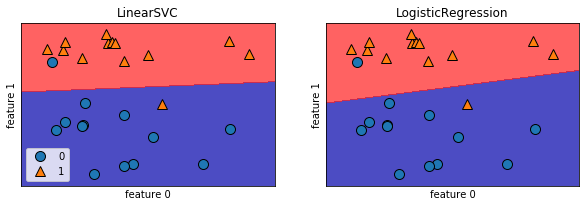

In [85]:
from sklearn.linear_model import LogisticRegression # sklearn : 사이키트를 패키지로 쓸 때
from sklearn.svm import LinearSVC # sklearn.?? : 사이키트 패키지 밑에 있는 서브 패키지
import mglearn

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize = (10,3)) # subplot(도화지를 만들어서) 1행 2열로 시각화 해라. figzise()
# axes = 도화지

# Support Vector Classifier (SVC) : 서포트 벡터로 만들어진 "분류기."    *svr : 예측

for model, ax in zip([LinearSVC(), LogisticRegression()], axes): # axes엔 2장이 있음 (1행 2열)=> svc&axes, LR&axes
    clf = model.fit(X,y) # 자동으로 (회귀분석에서) 계수를 만들어냄.
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax=ax, alpha=.7)
    # 2d로 하게 되고, X로 들어온 값을 ... ax = axes = 도화지, alpha = 불투명도
    # eps = 0.5 이상 =>  빨강, 이하 = 파랑
    
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend()

In [92]:
# select : model_select, feature_select(변수 선택), feature extraction(변수 추출)

# model_select : 모델에서 필요한 데이터를 어떻게 나눌 것인지 : train_test_split, group_kfold, kfold
# feature_select : RFE : 모델을 돌려봐서 중요하지 않은 데이터 (분산이 작은 데이터) 제거. 
# feature_extraction : countVectorize() : 이 데이터가 있냐, 없냐
# Tf-idf : 모든 문서에 나타나는 단어는 중요하지 않다. : 역문서 빈도 => 값이 너무 크니까 앞에 log를 붙여야 함.
# 분류 평가 : accuracy_score, clasification_report, precision/recall/f1_score
# 예측 평가

# 절차 :  모델 생성 / 선택 -> fitting -> predict -> 평가


from sklearn.datasets import load_breast_cancer # 유방암 정보(2차원)
from sklearn.model_selection import train_test_split # train data와 test data를 랜덤하게 분리한다.
# train data -> 0.75, test data -> 0.25 (비율)

cancer = load_breast_cancer() # data(독립변수),  target(종속변수)이 있음.
# 행렬 데이터 중 열 이름 = 변수 이름 : cancer.feature_names
print(cancer.feature_names)
print(cancer.data.shape) # (560, 30)

data = pd.DataFrame(cancer.data)
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # random_state = seed
# stratify = 층화. target을 중심으로 비율이 0.25가 될 수 있게 '층을 나눠라'
# 랜덤으로 나눔 : 0.75 / 0.25
# cancer.data 개수 = cancer.target 개수

logreg = LogisticRegression().fit(X_train, y_train)

# score : 정분류율을 구하라.
# TP: true positive, FP : false positive, TN: true negative, FN : false negative

# 정분류율 : (TP+FN) / (TP+FP+TN+FN)
# 오분류율 : (FP+TN) / (TP+FP+TN+FN)
# 정밀도 : TP / (TP+FP) : 맞췄다고 예측한 것 중에 실제로 맞춘 것
# 재형률(민감도) : TP / (TP+TN) : 실제로 true인 것 중에 맞춘 비율..
# 특이도 : FN / (FP+FN)

# 신뢰도와 정확도는 반비례 관계. trade off(대립) 관계
# diag : 행렬에서 대각선 값들만 뽑아내는 것.

# 왜 나눌까? 

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
# if ) train은 잘 나오는데, test가 잘 안 나오면  -> 과대적합
# else) 둘 다 잘 나오면 좋은 모델~
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.1

C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [93]:
# 모델 선택

In [96]:
import numpy as np
from sklearn.model_selection import GroupKFold
# model_selection 모델 데이터를 구분

X = np.array([[1,2],[3,4],[5,6],[7,8]]) # 4*2 변수 2개만 있음. 
y = np.array([1,2,3,4]) # 종속변수

groups = np.array([0,0,2,2])
group_kfold = GroupKFold(n_splits=2) # 그룹을 2개로 나눠라
group_kfold.get_n_splits(X, y, groups)
print(group_kfold)

# 1,2  1
# 3,4  2

# 5,6  3
# 7,8  4


for train_index, test_index in group_kfold.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

GroupKFold(n_splits=2)
TRAIN: [0 1] TEST: [2 3]
[[1 2]
 [3 4]] [[5 6]
 [7 8]] [1 2] [3 4]
TRAIN: [2 3] TEST: [0 1]
[[5 6]
 [7 8]] [[1 2]
 [3 4]] [3 4] [1 2]


In [99]:
# feature_selection
from sklearn.datasets import make_friedman1 # 데이터 생성
# 재귀적으로 특징 제거
from sklearn.feature_selection import RFE # RFE = recursive feature elimination
from sklearn.svm import SVR


X,y = make_friedman1(n_samples=50, n_features=10, random_state=0) # 샘플(관측수)은 50개, 변수(열관측)는 10개 
estimator = SVR(kernel = "linear") # kernel = "linear" : 선형회귀
# Regression SVC : clasification 분류
selector = RFE(estimator, 5, step=1) # 한 번에 하나씩 제거해서(step=1) 변수를 10개 중 5개만 남기겠다.
# 변수를 제거하는 이유 : 잡음(노이즈) 제거    *영향력이 없는 데이터들은 악영향을 끼치기 때문에 삭제하는 게 맞음.
selector = selector.fit(X,y)
selector.support_
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [100]:
# text mining => vectorizing
# problem, of, evil, queen, horizon
sample = ['problem of evil', 'evil queen','horizon problem'] # 중복되지 않은 단어 : 5개 

In [104]:
# 특징 추출
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer() # 단어를 세는 것
X = vec.fit_transform(sample)
print(type(X))
X
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
# Term frequency(단어의 빈도) + inverse document frequency(역문서 빈도)
# 단어수 / 전체문서 => 전체문서 / 단어수
# 역문서 빈도 : 자주 등장하지 않은 단어에다가 가점을 준 것
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [106]:
# 분류
# 예측

In [108]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = [0,2,1,3]
y_true = [0,1,2,3]

accuracy_score(y_true, y_pred, normalize=False) # 정확도 - 일치하는 것 확률 출력
# 왜 0.5? => normalize되어 있으니까. -> false = 2

2

In [111]:
# SVC : rbf(방사형 커널), poly, sigmoid(0~1 값으로 return)
#↑ sv를 사용해서 최적화하고 고차원으로 문제를 해결하고 ..
# cross validation : 5개(cv=5) -> 데이터를 다섯덩어리로 나눔
# 그 중 4개는 train, 1개는 test로 배정 => 그걸 돌려가면서 적용해보는 것.

from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = svm.SVC(gamma = 'scale', random_state=0) # 모델을 가리키는 이름 : clf
# gamma : kernel의 모양을 통제하는 값
cross_val_score(clf, X, y, scoring='recall_macro', cv=5)
# recall : 민감도로 측정하라.
# 결과도 5개 (cv=5)

# SVC : support vector clasifier : 

# combex hall의 맨 끝단을 지나는 게 support vector => 직교하는 지점을 딱 반으로 나누는 게 svm(machine)
# svm은 차원을 추가하는 걸 좋아함 : "kernel"


# SVR

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [113]:
# matrix : 척도
from sklearn.metrics import confusion_matrix

y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]
confusion_matrix(y_true, y_pred)

  #   0  1  2
# 0   2  0  0  # 0일 때 0, 0일 때 1, 0일 때 2 의 개수
# 1   0  0  1 
# 2   1  0  2

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [120]:
import numpy as np
import sklearn.metrics as metrics

y = np.array([1,1,1,1,0,0]) # 실제값
p = np.array([1,1,0,0,0,0]) # 예측값

accuracy = np.mean(np.equal(y,p)) # 정확도 
right = np.sum(y*p==1) # '1'로 같은 것

precision = right / np.sum(p) # 예측값 => 정밀도 : TP / (TP+FP)
recall = right / np.sum(y) # 실제값 => 실제로 맞춘 개수 / 실제 값 개수  : 민감도 => TP / (TP + TN)

f1 = 2*precision*recall / (precision+recall)

# 매개변수 = 종속변수의 실제값(y), 예측값(p)

print('accuracy', metrics.accuracy_score(y,p))
print('precision', metrics.precision_score(y,p))
print('recall', metrics.recall_score(y,p))
print('f1', metrics.f1_score(y,p))
print(metrics.classification_report(y,p)) # 전체적인 걸 한 번에 보여준다. # 혼동행렬

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



In [144]:
# 문제
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# make_classification() : 설정에 따른 분류용 가상 데이터를 생성하는 명령
X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=0)

print(X[:5,:]) # 16*2, # y = 종속변수 = 1차원 : 16개(n_samples)
print(X.shape) 

print(y) # n_features=2 니까 0이랑 1로 나옴. n_features=3이면 0,1,2

# 1) LogisticRegression을 실시하시오
model = LogisticRegression()
model.fit(X,y) # 계수가 만들어짐

# 2) 훈련 데이터를 예측하시오
y_hat =  model.predict(X) # 훈련 데이터 = X

# 3) 결과를 평가하시오.(precision, recall, f1_score)

# precision(정밀도)
print("정밀도",metrics.precision_score(y,y_hat))

# recall(민감도)
print("민감도", metrics.recall_score(y,y_hat))

# f1_score
print("f1스코어", metrics.f1_score(y,y_hat))

# 전체를 한꺼번에 보기
print("전체 보기", metrics.classification_report(y,y_hat))


print(metrics.confusion_matrix(y, y_hat, labels=[1,0]))

[[ 2.03418291 -0.38437236]
 [ 4.06377686  0.17863836]
 [ 0.41966783 -1.38206096]
 [-1.27225991  0.6600493 ]
 [-0.81664689  1.16942291]]
(16, 2)
[0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1]
정밀도 0.8571428571428571
민감도 0.75
f1스코어 0.7999999999999999
전체 보기               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

[[6 2]
 [1 7]]


C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
